# Projet : 
Défis sécuritaire et apport de l’IA : analyse de la situation sécuritaire du
Burkina Faso à partir de sources de données hétérogènes.

# Introduction


## 1) Mise en place de la pipeline 

# 2) Construction de la dataset 

# Description de la base de donnée
Cet ensemble de données recueille des informations sur les attaques menés au Burkina Faso de l'année 2015, sa date de commencement jusqu'a nos jours. au Brésil et se concentre sur la question de savoir si 

eventid = l'identifiant de l'evenement
iyear = l'année de l'évènement
imonth = le mois de l'évènement
ijour= le jour qu'a eu l'évènement
provstate = la province
city = la ville qui a été attaqué
lattitude = la lattitude
longitude = la longitude
attaquetype_txt1 = le type d'attaque
targtype_txt1 = type de cible
gname = identité des malfrats
weaptype_txt1 = le type d'arme
nkill = nombre total de victime
nkillter = nombre de victime coté assaillant
nwound = nombre total de blessé
nwoundte = nombre de blessé coté assaillants

# IMPORTATION DES BIBLIOTEQUES ET DONNÉES

In [170]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()
%matplotlib inline
import os as os
import openpyxl

In [12]:
#!pip install seaborn
!pip install openpyxl

     ------------------------------------ 242.1/242.1 kB 285.2 kB/s eta 0:00:00


In [171]:
os.chdir=("C:\ANABEBOU\MASTER FD IA\CITASUMS\TRAVAUX GROUP4\archive")

path=os.path.join(os.path.abspath(os.path.join(os.getcwd(),os.pardir,os.pardir)),"TRAVAUX GROUP4","archive")

In [166]:
path
#ISO-8859-1

'C:\\ANABEBOU\\MASTER FD IA\\CITASUMS\\TRAVAUX GROUP4\\archive'

In [144]:
os.getcwd()

'C:\\ANABEBOU\\MASTER FD IA\\CITASUMS\\citadel_env\\Scripts'

In [172]:
data=pd.read_csv(os.path.join(path,"globalterrorismdb_0522dist.csv"), sep=";", encoding = "ISO-8859-1")

In [19]:
#data2=pd.read_excel(os.path.join(path,"Africa_1997-2022_Sep16.xlsx"))
#, encoding = "ISO-8859-1"

In [207]:
data2=pd.read_csv(os.path.join(path,"Africa_1997-2022_Sep16.csv"), sep=";", encoding = "ISO-8859-1")

In [174]:
data["iyear"]

0         1970
1         1970
2         1970
3         1970
4         1970
          ... 
209701    2020
209702    2020
209703    2020
209704    2020
209705    2020
Name: iyear, Length: 209706, dtype: int64

# Preliminary Wrangling

In [208]:
# Chargement de la database
filtre2 = data2['EVENT_TYPE'] !="Protests"
data2=data2[filtre2]

In [176]:
data2.shape

(223354, 29)

In [209]:
# Chargement de la database
filtre3 = data2['ACTOR2'] !="Civilians (Burkina Faso)"
data2=data2[filtre3]

In [210]:
data2.shape

(220170, 29)

In [105]:
#os.chdir('/home/salma/')

In [106]:
#path='base_de_donnee.csv'

In [111]:
#data = pd.read_csv('base_de_donnee.csv', sep = ';', encoding= "ISO-8859-1")

/tmp/ipykernel_7434/4060974849.py:1: DtypeWarning: Columns (4,31,33,54,61,62,63,70,76,79,90,92,94,96,107,112,114,115,117,118,119,121) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('base_de_donnee.csv', sep = ';', encoding= "ISO-8859-1")


In [81]:
#data2=pd.read_csv(os.path.join(path,"Africa_1997-2022_Sep16.csv"), sep=";", encoding = "ISO-8859-1")

In [115]:
data2.head(1)

,ï»¿ISO,EVENT_ID_CNTY,EVENT_ID_NO_CNTY,EVENT_DATE,YEAR,TIME_PRECISION,EVENT_TYPE,SUB_EVENT_TYPE,ACTOR1,ASSOC_ACTOR_1,...,ADMIN3,LOCATION,LATITUDE,LONGITUDE,GEO_PRECISION,SOURCE,SOURCE_SCALE,NOTES,FATALITIES,TIMESTAMP
0,12,ALG1,1,01-janvier-1997,1997,1,Violence against civilians,Attack,GIA: Armed Islamic Group,NaN,...,NaN,Douaouda,"36,672","2,789",1,Algeria Watch,Other,5 January: Beheading of 5 citizens in Douaouda...,5,1582579226


In [83]:
# Spécification des colonnes a utiliser

#collones = ['eventid', 'iyear', 'country_txt', 'provstate', 'city', 'latitude', 'longitude', 'attacktype1_txt', 'targtype1_txt', 'gname', 'weaptype1_txt', 'nkill', 'nkillter', 'nwound', 'nwoundte', 'nhostkid']

In [211]:
coldata2=["EVENT_ID_NO_CNTY", "YEAR", "COUNTRY", "EVENT_TYPE", "ACTOR1", "ADMIN1", "LOCATION", "LATITUDE", "LONGITUDE", "FATALITIES"]

In [212]:
data2=data2[coldata2]

In [213]:
data2=data2.rename(columns = {"EVENT_ID_NO_CNTY": 'eventid', "YEAR":'iyear', "COUNTRY":'country_txt', "EVENT_TYPE":'attacktype1_txt', "ACTOR1":'gname', "ADMIN1":'provstate', "LOCATION":'city', "LATITUDE":'latitude', "LONGITUDE":'longitude', "FATALITIES":'nkill'})

# I PRETRAITEMENT DE LA BASE DATA2 IMPORTÉ DE ACLED

In [86]:
#data2=data2[coldata2]

In [214]:
# Filtrage des donnees pour considerer les données du burkina à par tir de 2015
filtre1 = data2['iyear'] > 2020
data2=data2[filtre1]
data2=data2[data2['country_txt'] == 'Burkina Faso']

In [215]:
data2.shape

(1664, 10)

# II PRETRAITEMENT DE LA BASE DATA2 IMPORTÉ DE GTDB

In [190]:
# Spécification des colonnes a utiliser

collones = ['ï»¿eventid', 'iyear', 'country_txt', 'provstate', 'city', 'latitude', 'longitude', 'attacktype1_txt', 'targtype1_txt', 'gname', 'weaptype1_txt', 'nkill', 'nkillter', 'nwound', 'nwoundte', 'nhostkid']

In [157]:
d=data['iyear']
d

0         1970
1         1970
2         1970
3         1970
4         1970
          ... 
181686    2017
181687    2017
181688    2017
181689    2017
181690    2017
Name: iyear, Length: 181691, dtype: int64

In [125]:
# Filtrage des donnees pour considerer les données du burkina à par tir de 2015
#filtre = data['iyear'] >= 2015

In [191]:
data_filter=data[data['iyear'] > 2014]

In [202]:
data_filter[data_filter['iyear']==2021]

,ï»¿eventid,iyear,country_txt,provstate,city,latitude,longitude,attacktype1_txt,targtype1_txt,gname,weaptype1_txt,nkill,nkillter,nwound,nwoundte,nhostkid,nkill_FDS_civils,nwound_FDS_civils


In [192]:
#data_filter.head(5)

In [193]:
data_filter=data_filter[data_filter['country_txt'] == 'Burkina Faso']

In [194]:
data_filter.shape

(391, 135)

In [195]:
# selection des colonne
data_filter = data_filter[collones]

In [196]:
# Calcul du nombre de décès et de blessés parmis les FDS et CIVILS
data_filter = data_filter.assign(nkill_FDS_civils = data_filter['nkill'] - data_filter['nkillter'], nwound_FDS_civils = data_filter['nwound'] - data_filter['nwoundte'])

In [197]:
data_filter.head(2)

,ï»¿eventid,iyear,country_txt,provstate,city,latitude,longitude,attacktype1_txt,targtype1_txt,gname,weaptype1_txt,nkill,nkillter,nwound,nwoundte,nhostkid,nkill_FDS_civils,nwound_FDS_civils
146545,201504040024,2015,Burkina Faso,Sahel,Tambao,"14,781106","0,013595",Hostage Taking (Kidnapping),Police,Al-Mua'qi'oon Biddam Brigade (Those who Sign w...,Firearms,NaN,0.0,2.0,0.0,1.0,NaN,2.0
152434,201508230059,2015,Burkina Faso,Sahel,Oursi,"14,678733","-0,462031",Armed Assault,Police,Boko Haram,Firearms,1.0,0.0,1.0,0.0,NaN,1.0,1.0


In [116]:
#collones = ['eventid', 'iyear', 'imonth', 'iday', 'country_txt', 'provstate', 'city', 'latitude', 'longitude', 'attacktype1_txt', 'targtype1_txt', 'gname', 'weaptype1_txt', 'nkill', 'nkillter', 'nwound', 'nwoundte', 'nhostkid']

# Merge des deux dataframes

In [216]:
liste_data = [data_filter, data2]
data_fusion = pd.concat(liste_data)

In [217]:
data_fusion.shape

(2055, 19)

In [219]:
#filtre2 = data_fusion['iyear'] >= 2022
#data_filter2=data_fusion[filtre2]

In [102]:
data_fusion.shape

(1712, 18)

In [229]:
data_fusion[data_fusion['iyear']==2023]

,ï»¿eventid,iyear,country_txt,provstate,city,latitude,longitude,attacktype1_txt,targtype1_txt,gname,weaptype1_txt,nkill,nkillter,nwound,nwoundte,nhostkid,nkill_FDS_civils,nwound_FDS_civils,eventid


In [242]:
# Diagramme en secteurs
#data_fusion['nkill_FDS_civils'].value_counts().plot(kind='pie')
# Cette ligne assure que le pie chart est un cercle plutôt qu'une éllipse
#plt.axis('equal') 
#plt.show() # Affiche le graphique

# Diagramme en tuyaux d'orgues
#y=data_fusion['iyear'].value_counts(normalize=True)
#plt.show()
#tab = data_fusion.sort_values("iyear") # tri des valeurs de la variable X (croissant)
#tab
# cumsum calcule la somme cumulée
#Y=list(y)
#X=[2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015]
#X
from bokeh.plotting import figure, output_file, show

In [257]:
#show(graph)

In [247]:
graph.line(df, data_fusion['iyear'])

GlyphRenderer(id='1039', ...)

# QUELQUES VISUALISATIONS

In [271]:
#data_fusion['gname'].value_counts().plot(kind='barh', size=1)

<AxesSubplot:>

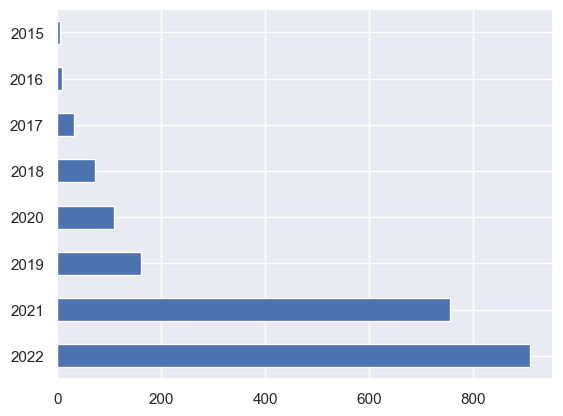

In [261]:
data_fusion['iyear'].value_counts().plot(kind='barh')

In [236]:
import plotly as px
#import Bokeh as bk
!pip install bokeh

     ---------------------------------------- 18.5/18.5 MB 1.1 MB/s eta 0:00:00


In [230]:
#plt.hist([data_fusion["iyear"].unique(), data_fusion["provstate"]])
#plt.show()

In [242]:
Y

[0.30803502842218466,
 0.2862190812720848,
 0.13688738669534492,
 0.1344292518051928,
 0.06176063911507144,
 0.036411123060377935,
 0.01874327853740974,
 0.01751421109233369]

In [245]:
data = {'c':X, 
        'v1':Y
      }

df = pd.DataFrame(data)

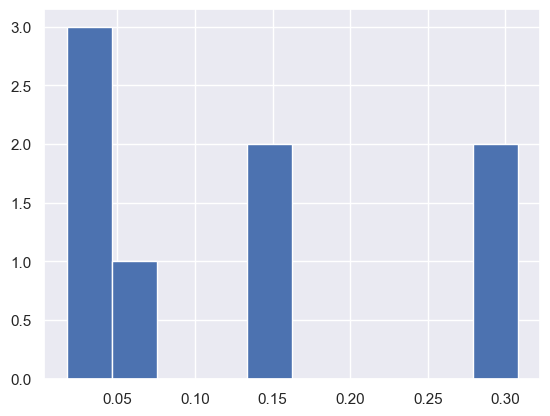

In [250]:
hist = df["v1"].hist()

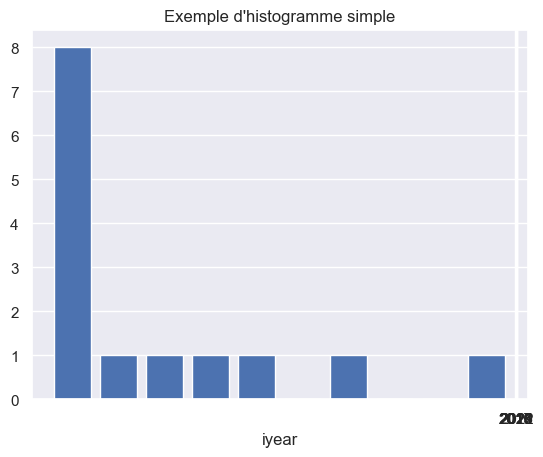

In [223]:
plt.hist(data_fusion['provstate'].value_counts(), rwidth=0.8)  # Création de l'histogramme
plt.xlabel('iyear')
plt.xticks(np.arange(2015, 2023))
#plt.ylabel('Nombres')
plt.title("Exemple d'histogramme simple")
plt.show()
#, bins=inter


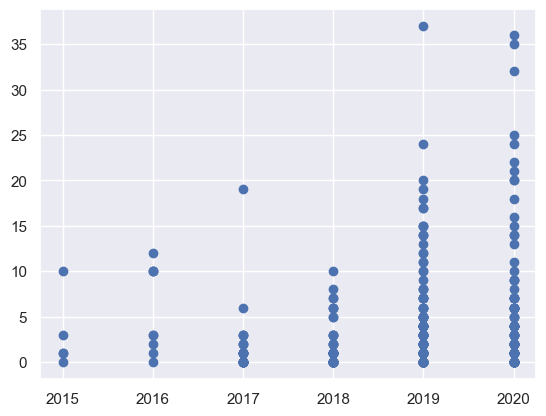

In [270]:
import matplotlib.pyplot as plt
plt.scatter(data_fusion['iyear'], data_fusion['nkill_FDS_civils'])

In [272]:
#data_fusion['iyear'].value_counts()
#barplot(x='day',y='tip', data=data,
#hue='sex')
#.plot(kind='barh')
#data_fusion['iyear'].plot(kind='barh')

# Eregistrement de la base globale

In [231]:
data_fusion.to_csv("data_fusion.csv", index=False)